In [1]:
import os
import netCDF4
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature

from matplotlib.animation import FuncAnimation

In [2]:
level = 850
AntPen_W = -100
AntPen_E = -40
AntPen_S = -70
AntPen_N = -45

In [3]:
#################
# Plot figure lat0
#################

## Load Data
#Path
filename_Pres = '2017_Mar_pres.nc'

#Load netcdf
ncdf_pres = netCDF4.Dataset(filename_Pres)

#Get dimension
lonsp = ncdf_pres.variables['longitude'][:]
latsp = ncdf_pres.variables['latitude'][:]
levels = ncdf_pres.variables['level'][:]
times = ncdf_pres.variables['time'][:]

#Calculate datetime
dtimes = np.empty(len(times), dtype='datetime64[h]')
for i,t in enumerate(times):
    dtimes[i] = np.datetime64('1900-01-01') + np.timedelta64(np.int64(t),'h')
dtimes = dtimes.astype('datetime64')
print(dtimes[0])
#dtime = pd.to_datetime(dtime.astype('datetime64[M]'))

level=700   
Z = ncdf_pres.variables['z'][:,np.where(levels == level)[0][0],:,:]/10
T = ncdf_pres.variables['t'][:,np.where(levels == level)[0][0],:,:] - 273.15
U = ncdf_pres.variables['u'][:,np.where(levels == level)[0][0],:,:]
V = ncdf_pres.variables['v'][:,np.where(levels == level)[0][0],:,:]

2017-03-27T00


In [4]:
#################
# Load Data
#################
#Path
filename_Pres = '2017_Mar_sfc.nc'

#Load netcdf
ncdf_sfc = netCDF4.Dataset(filename_Pres)

#Get dimension
lons = ncdf_sfc.variables['longitude'][:]
lats = ncdf_sfc.variables['latitude'][:]
times = ncdf_sfc.variables['time'][:]

#Calculate datetime
dtimes = np.empty(len(times), dtype='datetime64[h]')
for i,t in enumerate(times):
    dtimes[i] = np.datetime64('1900-01-01') + np.timedelta64(np.int64(t),'h')
dtimes = dtimes.astype('datetime64')

print(ncdf_sfc.variables)

pcp = ncdf_sfc.variables['tp'][:,:,:]*1000
tcwv = ncdf_sfc.variables['tcwv'][:,:,:]
msl = ncdf_sfc.variables['msl'][:,:,:]/100
u10 = ncdf_sfc.variables['u10'][:,:,:]
v10 = ncdf_sfc.variables['v10'][:,:,:]
v10 = ncdf_sfc.variables['v10'][:,:,:]


<ipython-input-4-1574e6a2f8a1>:21: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(ncdf_sfc.variables)


{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (561,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (141,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (24,)
filling on, default _FillValue of -2147483647 used, 'u10': <class 'netCDF4._netCDF4.Variable'>
int16 u10(time, latitude, longitude)
    scale_factor: 0.0007122270831704065
    add_offset: -0.9357198830728352
    _FillValue: -32767
    missing_value: -32767
    units: m s**-1
    long_name: 10 metre U wind component
unlimited dimensions

C:\Users\corre\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewiths'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


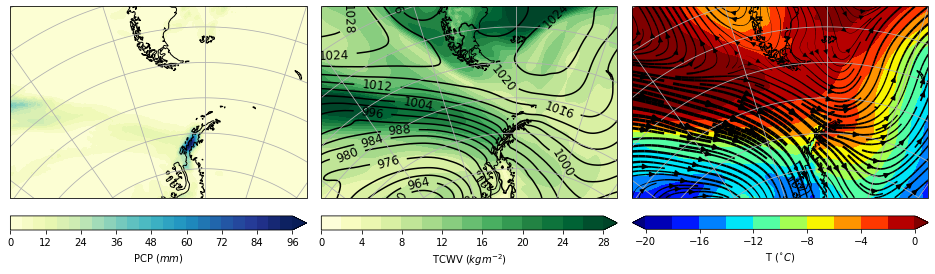

In [5]:
#################
# Plot Case Study
#################

i_ini = np.argwhere(dtimes == np.datetime64('2017-03-27T00'))[0][0]
i_end = np.argwhere(dtimes == np.datetime64('2017-03-27T23'))[0][0]
#i_dtime = np.argwhere(dtimes == np.datetime64('2016-07-16T12'))[0][0]

##Plot
projection=ccrs.LambertConformal(central_longitude=-60,standard_parallels=(-75,-45))
#Define map
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,3,1, projection=projection)
ax1.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax1.coastlines(resolution='50m')
ax1.gridlines(draw_labels=False)

ax2 = plt.subplot(1,3,2, projection=projection)
ax2.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax2.coastlines(resolution='50m')
ax2.gridlines(draw_labels=False)

ax3 = plt.subplot(1,3,3, projection=projection)
ax3.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax3.coastlines(resolution='50m')
ax3.gridlines(draw_labels=False)

#Plot ERA5
CS1 = ax1.contourf(lons, lats, np.sum(pcp[i_ini:i_end,:,:], axis=0), np.arange(0,100,4), cmap='YlGnBu', transform=ccrs.PlateCarree(), extend='max')
CB1 = plt.colorbar(CS1, orientation='horizontal', ax=ax1, pad=0.05)
CB1.set_label('PCP ($mm$)')

CS2b = ax2.contour(lons, lats, np.mean(msl[i_ini:i_end,:,:], axis=0), np.arange(800,1100,4), linewiths=.5, colors='k', transform=ccrs.PlateCarree())
CS2 = ax2.contourf(lons, lats, np.mean(tcwv[i_ini:i_end,:,:], axis=0), np.arange(0,30,2), cmap='YlGn', transform=ccrs.PlateCarree(), extend='max')
CB2 = plt.colorbar(CS2, orientation='horizontal', ax=ax2, pad=0.05)
CB2.set_label('TCWV ($kg m^{-2}$)')

CS3 = ax3.contourf(lonsp, latsp, np.mean(T[i_ini:i_end,:,:], axis=0), np.arange(-20,2,2), cmap='jet', transform=ccrs.PlateCarree(), extend='both')
CB3 = plt.colorbar(CS3, orientation='horizontal', ax=ax3, pad=0.05)
CB3.set_label('T ($^{\circ}C$)')

speed = np.sqrt(np.mean(U[i_ini:i_end,:,:], axis=0)**2 + np.mean(V[i_ini:i_end,:,:], axis=0)**2)
lw = 4 * speed / speed.max()
CS4 = ax3.streamplot(lonsp, latsp, np.mean(U[i_ini:i_end,:,:], axis=0), np.mean(V[i_ini:i_end,:,:], axis=0), density=1.5, linewidth=lw, color='k', transform=ccrs.PlateCarree())

#Set Parameters
ax2.clabel(CS2b, inline=1, fontsize=12, fmt='%1.0f')
#cb.set_label('T $^\circ$C', rotation=0, fontsize=12)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, wspace=0.05)

MovieWriter imagemagick unavailable; using Pillow instead.
<ipython-input-7-1432c8aaf536>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(1,3,1, projection=projection)
<ipython-input-7-1432c8aaf536>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot(1,3,2, projection=projection)
<ipython-input-7-1432c8aaf536>:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previ

C:\Users\corre\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewiths'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
<ipython-input-7-1432c8aaf536>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(1,3,1, projection=projection)
<ipython-input-7-1432c8aaf536>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subpl

<ipython-input-7-1432c8aaf536>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(1,3,1, projection=projection)
<ipython-input-7-1432c8aaf536>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot(1,3,2, projection=projection)
<ipython-input-7-1432c8aaf536>:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a futur

C:\Users\corre\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewiths'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
<ipython-input-7-1432c8aaf536>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(1,3,1, projection=projection)
<ipython-input-7-1432c8aaf536>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subpl

<ipython-input-7-1432c8aaf536>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(1,3,1, projection=projection)
<ipython-input-7-1432c8aaf536>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot(1,3,2, projection=projection)
<ipython-input-7-1432c8aaf536>:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a futur

C:\Users\corre\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewiths'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
<ipython-input-7-1432c8aaf536>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(1,3,1, projection=projection)
<ipython-input-7-1432c8aaf536>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subpl

<ipython-input-7-1432c8aaf536>:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(1,3,1, projection=projection)
<ipython-input-7-1432c8aaf536>:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot(1,3,2, projection=projection)
<ipython-input-7-1432c8aaf536>:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a futur

C:\Users\corre\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewiths'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


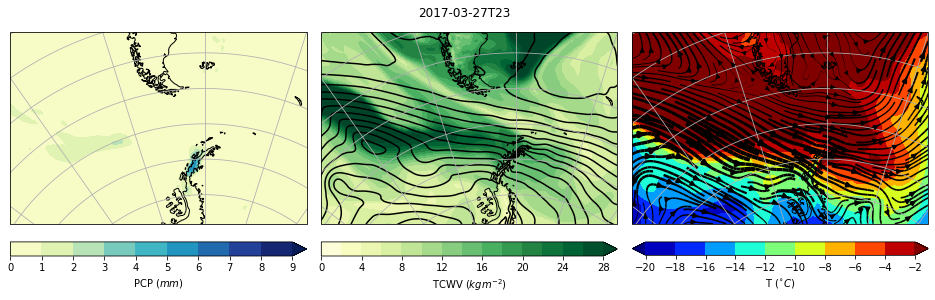

In [7]:
#################
# Plot Animation Case Study
#################


i_ini = np.argwhere(dtimes == np.datetime64('2017-03-27T00'))[0][0]
i_end = np.argwhere(dtimes == np.datetime64('2017-03-27T23'))[0][0]
#i_dtime = np.argwhere(dtimes == np.datetime64('2016-07-16T12'))[0][0]

lonx,laty = np.meshgrid(lons,lats)

##Plot
projection=ccrs.LambertConformal(central_longitude=-60,standard_parallels=(-75,-45))
#Define map
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,3,1, projection=projection)
ax1.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax1.coastlines(resolution='50m')
ax1.gridlines(draw_labels=False)

ax2 = plt.subplot(1,3,2, projection=projection)
ax2.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax2.coastlines(resolution='50m')
ax2.gridlines(draw_labels=False)

ax3 = plt.subplot(1,3,3, projection=projection)
ax3.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
ax3.coastlines(resolution='50m')
ax3.gridlines(draw_labels=False)

#Plot ERA5
ax1.collections = [] 
anim_pcp = ax1.contourf(lons, lats, pcp[0,:,:], np.arange(0,10,1), cmap='YlGnBu', transform=ccrs.PlateCarree(), extend='max')
CB1 = plt.colorbar(anim_pcp, orientation='horizontal', ax=ax1, pad=0.05)
CB1.set_label('PCP ($mm$)')

anim_msl = ax2.contour(lons, lats, msl[0,:,:], np.arange(800,1100,4), colors='k', transform=ccrs.PlateCarree())
anim_tcwv = ax2.contourf(lons, lats, tcwv[0,:,:], np.arange(0,30,2), cmap='YlGn', transform=ccrs.PlateCarree(), extend='max')
CB2 = plt.colorbar(anim_tcwv, orientation='horizontal', ax=ax2, pad=0.05)
CB2.set_label('TCWV ($kg m^{-2}$)')

anim_T = ax3.contourf(lonsp, latsp, T[0,:,:], np.arange(-20,0,2), cmap='jet', transform=ccrs.PlateCarree(), extend='both')
CB3 = plt.colorbar(anim_T, orientation='horizontal', ax=ax3, pad=0.05)
CB3.set_label('T ($^{\circ}C$)')

speed = np.sqrt(np.mean(U[:,:,:], axis=0)**2 + np.mean(V[i_ini:i_end,:,:], axis=0)**2)
lw = 4 * speed / speed.max()
anim_wind = ax3.streamplot(lonsp, latsp, U[0,:,:], V[0,:,:], density=1.5, linewidth=lw, color='k', transform=ccrs.PlateCarree())

label1 = plt.suptitle(str(dtimes[0]), x=0.52, y=0.75) #ax1.annotate(str(dtimes[0]), xy=(-.07, 1.07), xycoords='axes fraction', ha='right', fontsize=14, zorder=200)

#Set Parameters
ax2.clabel(anim_msl, inline=1, fontsize=12, fmt='%1.0f')
#cb.set_label('T $^\circ$C', rotation=0, fontsize=12)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, wspace=0.05)


def init():
    anim_pcp.set_data([],[],[])
    anim_msl.set_data([])
    anim_tcwv.set_data([])
    anim_T.set_data([])
    anim_wind.set_data([], [])
    return anim_pcp, anim_msl, anim_tcwv, anim_T, anim_wind,

def animate(i):
    label1 = plt.suptitle(str(dtimes[i]), x=0.52, y=0.75)
    
    ax1 = plt.subplot(1,3,1, projection=projection)
    ax2 = plt.subplot(1,3,2, projection=projection)
    ax3 = plt.subplot(1,3,3, projection=projection)
    ax1.clear()
    ax2.clear()
    ax3.clear()
    
    ax1 = plt.subplot(1,3,1, projection=projection)
    ax1.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
    ax1.coastlines(resolution='50m')
    ax1.gridlines(draw_labels=False)

    ax2 = plt.subplot(1,3,2, projection=projection)
    ax2.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
    ax2.coastlines(resolution='50m')
    ax2.gridlines(draw_labels=False)

    ax3 = plt.subplot(1,3,3, projection=projection)
    ax3.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N])
    ax3.coastlines(resolution='50m')
    ax3.gridlines(draw_labels=False)
    
    anim_pcp = ax1.contourf(lons, lats, pcp[i,:,:], np.arange(0,10,1), cmap='YlGnBu', transform=ccrs.PlateCarree(), extend='max')
    anim_msl = ax2.contour(lons, lats, msl[i,:,:], np.arange(800,1100,4), linewiths=.5, colors='k', transform=ccrs.PlateCarree())
    anim_tcwv = ax2.contourf(lons, lats, tcwv[i,:,:], np.arange(0,30,2), cmap='YlGn', transform=ccrs.PlateCarree(), extend='max')
    anim_T = ax3.contourf(lonsp, latsp, T[i,:,:], np.arange(-20,0,2), cmap='jet', transform=ccrs.PlateCarree(), extend='both')
    anim_wind = ax3.streamplot(lonsp, latsp, U[i,:,:], V[i,:,:], density=1.5, linewidth=lw, color='k', transform=ccrs.PlateCarree())
    return label1, anim_pcp, anim_msl, anim_tcwv, anim_T, anim_wind,
    
    
#anim = FuncAnimation(fig, animate, init_func=init, frames=np.size(dtimes), interval=300, repeat_delay=1000, blit=False)
anim = FuncAnimation(fig, animate, frames=np.size(dtimes), interval=300, repeat_delay=1000, blit=False)

anim.save('CaseStudy_1d_2017Mar.gif', writer='imagemagick', dpi=96)